<a href="https://colab.research.google.com/github/Ssendags/Data-science-Project-2---Denis-Ssendagire/blob/main/Ssendagire_Denis_Belt_Exam_Student_Success_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing libraries.
import pandas as pd

In [ ]:
# Loading the data.
filename = '/content/drive/MyDrive/Colab Notebooks/Option_B_clustering - Option_B_clustering.csv'
df = pd.read_csv(filename)
df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,1,78,85,80,85,82
1,0,2,2,1,0,60,0,1,70,68,70,64,60
2,0,3,5,1,0,60,0,1,72,71,74,88,75
3,0,1,5,0,0,60,0,1,69,30,63,35,75
4,1,2,3,0,0,60,0,1,70,65,62,75,68


Exploring and cleaning the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12737 non-null  int64
 1   highest_education     12737 non-null  int64
 2   imd_band              12737 non-null  int64
 3   age_band              12737 non-null  int64
 4   num_of_prev_attempts  12737 non-null  int64
 5   studied_credits       12737 non-null  int64
 6   disability            12737 non-null  int64
 7   passed_course         12737 non-null  int64
 8   assess_score_1        12737 non-null  int64
 9   assess_score_2        12737 non-null  int64
 10  assess_score_3        12737 non-null  int64
 11  assess_score_4        12737 non-null  int64
 12  assess_score_5        12737 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB


The data type for all entries is numerical (int), there are no missing values. The dataset has 12737 rows and 13 columns.

In [ ]:
# Checking for duplicates
df.duplicated().sum()

7

In [ ]:
# Dropping duplicates.
df = df.drop_duplicates()

In [ ]:
# Checking for inconsistent data.
df.describe()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
count,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000
mean,0.446819,2.090102,4.407070,0.339199,0.107463,74.773763,0.091909,0.763001,73.987274,74.915240,79.734328,75.661822,78.106127
std,0.497183,0.940932,2.806379,0.488965,0.389890,37.459380,0.288909,0.425259,19.166495,14.654117,17.653542,17.967908,19.529946
min,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,60.000000,0.000000,1.000000,66.000000,66.000000,69.000000,65.000000,67.000000
50%,0.000000,2.000000,4.000000,0.000000,0.000000,60.000000,0.000000,1.000000,77.000000,76.000000,81.000000,79.000000,80.000000
75%,1.000000,3.000000,7.000000,1.000000,0.000000,90.000000,0.000000,1.000000,86.000000,86.000000,95.000000,89.000000,96.000000
max,1.000000,4.000000,9.000000,2.000000,6.000000,630.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Preparing the data for modeling.

In [ ]:
# Import Libraries.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Scale the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1.112675,-0.095762,1.636668,3.396696,-0.275634,4.410984,-0.318137,0.557328,0.209370,0.688213,0.015050,0.519735,0.199387
1,-0.898735,-0.095762,-0.857748,1.351481,-0.275634,-0.394410,-0.318137,0.557328,-0.208042,-0.471916,-0.551431,-0.649062,-0.927132
2,-0.898735,0.967056,0.211288,1.351481,-0.275634,-0.394410,-0.318137,0.557328,-0.103689,-0.267187,-0.324839,0.686706,-0.159051
3,-0.898735,-1.158580,0.211288,-0.693734,-0.275634,-0.394410,-0.318137,0.557328,-0.260218,-3.065146,-0.947968,-2.263114,-0.159051
4,1.112675,-0.095762,-0.501402,-0.693734,-0.275634,-0.394410,-0.318137,0.557328,-0.208042,-0.676645,-1.004616,-0.036835,-0.517489


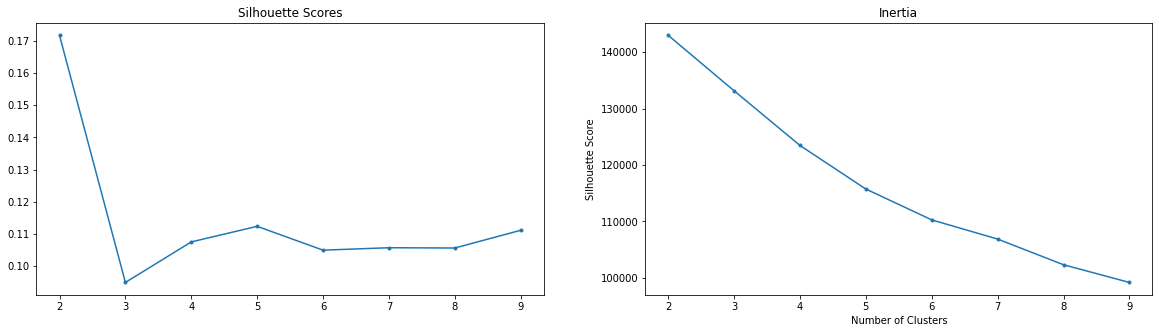

In [ ]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,10)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_df)
  sils.append(silhouette_score(scaled_df, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[1].plot(ks, inertias, marker = '.')
axes[1].set_title('Inertia')
axes[1].set_xticks(ks)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
axes[0].plot(ks, sils, marker = '.')
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

From the visualisation above the elbow method does not give a clear value for k but 2 is the most optimum given its silhouette score.

In [ ]:
# Refitting KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_df)
# Adding the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,cluster
0,1,2,9,2,0,240,0,1,78,85,80,85,82,0
1,0,2,2,1,0,60,0,1,70,68,70,64,60,1
2,0,3,5,1,0,60,0,1,72,71,74,88,75,0
3,0,1,5,0,0,60,0,1,69,30,63,35,75,1
4,1,2,3,0,0,60,0,1,70,65,62,75,68,1


In [ ]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,0,0.429080,2.157864,4.702077,0.372582,0.078576,71.621365,0.075252,0.90908,79.677864,80.568665,86.631335,83.343976,86.289733
1,1,0.481533,1.957491,3.829733,0.273868,0.163995,80.943089,0.124506,0.47712,62.850639,63.851336,66.236702,60.627642,62.090592


# **Explanatory visualisation of the clusters.**



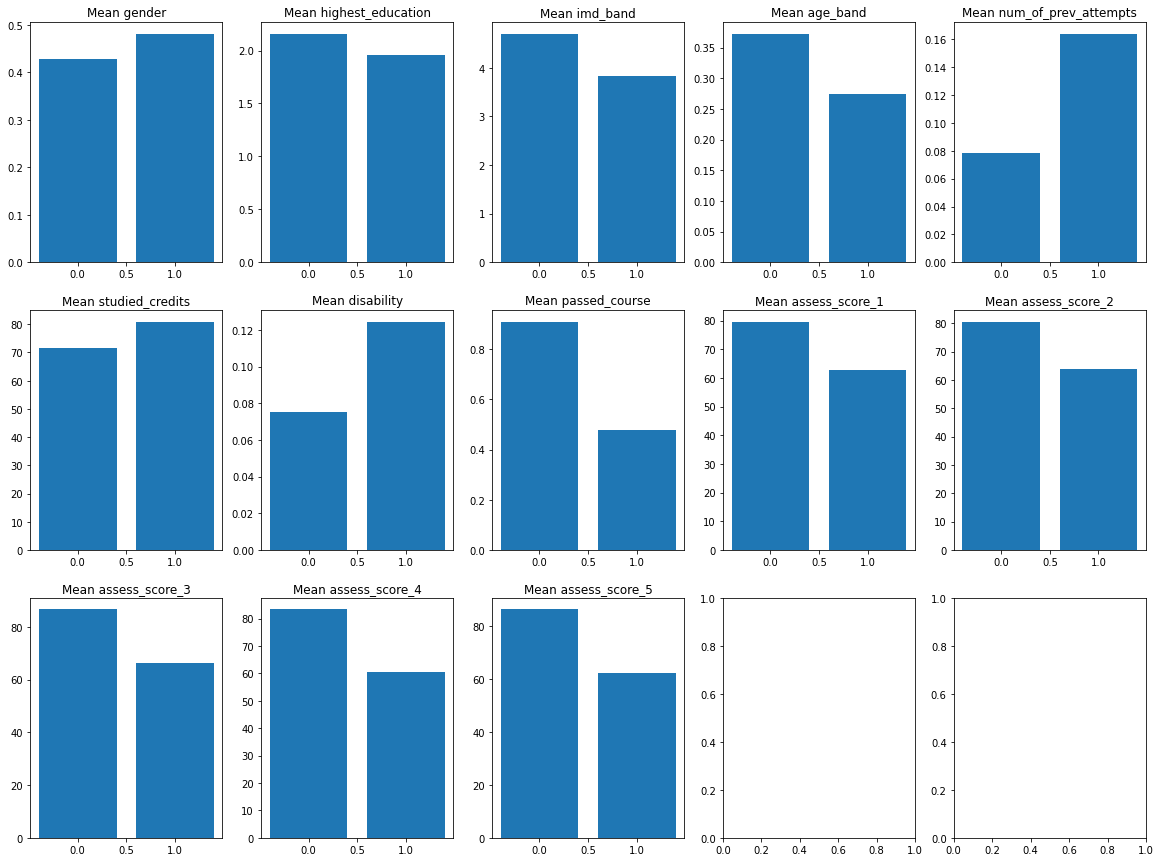

In [ ]:
# Visualize means 
fig, axes = plt.subplots(3,5, figsize = (20, 15))
# fig is an array of dimensions 3,5.  axes.ravel() will flatten it to 15,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

Cluster 0:

Those with the lesser depevation have higher education and lesser previous attempts. They also have higher scores in all assessments.

Cluster 1:

These are more deprived, with lesser education, higher previous attempts and with lesser scores in all assessments.

Visualising with scatter plot.

In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(df)
kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(scaled_df)

KMeans(n_clusters=2)

In [ ]:
# onverting to NumPy array
df = np.array(df)
u_labels = np.unique(label)

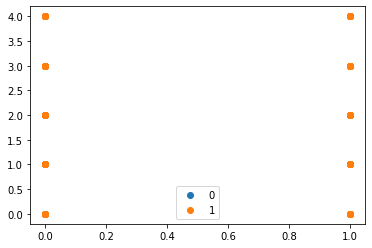

In [ ]:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()
plt.xlabel('')

# **Modeling the Dataset.**

In [ ]:
# Load Data
filename = '/content/drive/MyDrive/Colab Notebooks/Option_B_modeling.csv'
df1 = pd.read_csv(filename)
df1.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,...,module_CCC,module_DDD,module_EEE,module_FFF,module_GGG,presentation_0,presentation_2013B,presentation_2013J,presentation_2014B,presentation_2014J
0,1,2,9,2,0,240,0,1,78.0,85.0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,2,1,0,60,0,1,70.0,68.0,...,0,0,0,0,0,0,0,1,0,0
2,0,3,5,1,0,60,0,1,72.0,71.0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,5,0,0,60,0,1,69.0,30.0,...,0,0,0,0,0,0,0,1,0,0
4,1,2,3,0,0,60,0,1,70.0,65.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Exploring the data.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Columns: 931 entries, gender to presentation_2014J
dtypes: float64(910), int64(21)
memory usage: 90.5 MB


In [ ]:
# Checking for duplicates
df1.duplicated().sum()

0

In [ ]:
# Assigning 'passed_course' as target vector.
y = df1['passed_course']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: passed_course, dtype: int64

In [ ]:
# Assigning the rest of the columns as features Matrix.
X = df1.drop(columns="passed_course")
X.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,assess_score_1,assess_score_2,assess_score_3,...,module_CCC,module_DDD,module_EEE,module_FFF,module_GGG,presentation_0,presentation_2013B,presentation_2013J,presentation_2014B,presentation_2014J
0,1,2,9,2,0,240,0,78.0,85.0,80.0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,2,1,0,60,0,70.0,68.0,70.0,...,0,0,0,0,0,0,0,1,0,0
2,0,3,5,1,0,60,0,72.0,71.0,74.0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,5,0,0,60,0,69.0,30.0,63.0,...,0,0,0,0,0,0,0,1,0,0
4,1,2,3,0,0,60,0,70.0,65.0,62.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Import libraries.
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Train-test split the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# Scale the data.
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df1 = scaler.fit_transform(X)

In [ ]:
# Setting number of components
num_components = 200 
pca = PCA(n_components=num_components)
pctr = pca.fit_transform(scaled_df1)

Text(0, 0.5, 'Cumulative Variance')

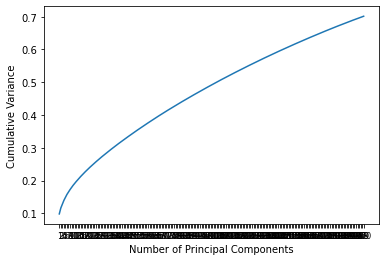

In [ ]:
# Plotting the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range(1, 201), pca.explained_variance_ratio_.cumsum())
plt.xticks(ticks=range(1,201), fontsize=8)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance")

From the above visualisation to achieve above 70%variance one needs not less than 200 principle components.

# **Using Convolution Neural Networks (CNN) model to predict which students will pass and which will fail**

In [ ]:
# Import libraries.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

Converting our target into a categorical. Since our target is numeric, the  computer recognizes the higher digits as having higher numeric value therefore not properly evaluate them.

In [ ]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
pctr = pctr.reshape(pctr.shape[0], 200, 1)

Defining the network structure

In [ ]:
# Save the input shape
input_shape = pctr.shape[1:4]
input_shape

(200, 1)

In [ ]:
# Sequential model
model = Sequential()

**Adding hidden layers.**

In [ ]:
# Convolutional layer
model.add(Conv2D(filters = 6, kernel_size = 3, input_shape = input_shape))
# Pooling layer
model.add(MaxPooling2D(pool_size = 2))
# Flattening layer
model.add(Flatten())
# Output layer
model.add(Dense(10, activation = 'softmax'))

ValueError: ignored

**Ran out of time before figuring out this error, therefore could not continue.**